## Calibration of lab probes 03

Probes A and K will be fixed under the canyons to measure conductivity at the heads of the canyons.

We used a maximum salinity of (200 g salt/ 4 l water) which is a density of 1.03282 g/cm^3. Repeat after I realized probe K had electrodes too close together.

File variables:

|variable name| type and shape|
|::|::|
|'ch1':| float, array(nsamples)|
|'ch2': |float, array(nsamples)|
|'ch3': |float, array(nsamples)|
|'ch4': |float, array(nsamples)|
|'dt': |float, scalar|
|'macORpc': |str ('mac')|
|'nSample': |float, scalar|
|'nSamples': |float, scalar|
|'portNumber':| int, scalar|
|'pp':| float, array, not sure what it has|
|'time':| float, array(nsamples)|
|'timeElapsed':| float,scalar|

In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
df = pd.read_csv('../LabProbesCalibration3/calibration3.csv',header=0)
print(df)


    salty  tap  percentage   density  temperature
0       0  200           0  0.997651       20.000
1      20  180          10  1.002500       20.003
2      40  160          20  1.004900       20.011
3      60  140          30  1.008760       20.012
4      80  120          40  1.012130       20.007
5     100  100          50  1.015310       20.007
6     120   80          60  1.018710       20.011
7     140   60          70  1.021870       20.003
8     160   40          80  1.024920       20.011
9     180   20          90  1.029080       20.006
10    200    0         100  1.031561       19.999


../LabProbesCalibration3/000pc.mat
../LabProbesCalibration3/010pc.mat
../LabProbesCalibration3/020pc.mat
../LabProbesCalibration3/030pc.mat
../LabProbesCalibration3/040pc.mat
../LabProbesCalibration3/050pc.mat
../LabProbesCalibration3/060pc.mat
../LabProbesCalibration3/070pc.mat
../LabProbesCalibration3/080pc.mat
../LabProbesCalibration3/090pc.mat
../LabProbesCalibration3/100pc.mat


Text(0.5,1,'CH4 - probe A ')

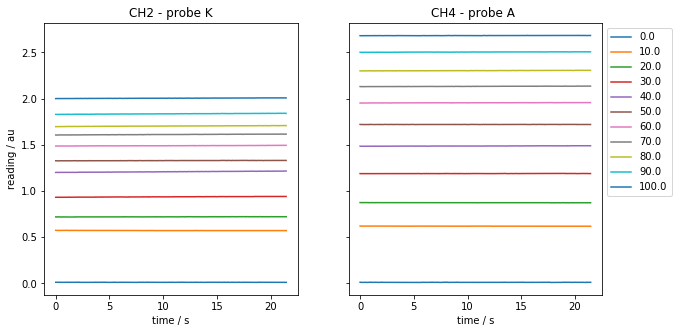

In [5]:
file_num = 11

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch4 = np.zeros(file_num)
std_read_ch4 = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

for filepath, ii in zip(glob.iglob('../LabProbesCalibration3/*.mat'), 
                                  range(file_num)):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch2 = mat['ch2']
    ch4 = mat['ch4']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch4[ii] = np.mean(ch4)
    std_read_ch4[ii] = np.std(ch4)
    
    ax0.plot(time,ch2)
    ax1.plot(time,ch4, label='%1.1f' %df.percentage[ii])
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH2 - probe K')
ax1.set_title('CH4 - probe A ')

Text(0.5,1,'Probe A')

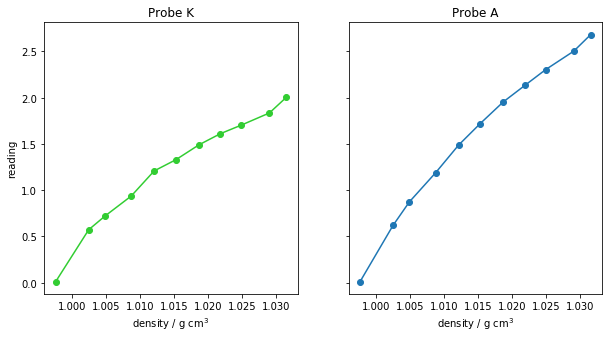

In [6]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax0.errorbar(df.density,mean_read_ch2, yerr=std_read_ch2, marker='o', color='limegreen')
ax1.errorbar(df.density,mean_read_ch4, yerr=std_read_ch4, marker='o')

ax0.set_ylabel('reading')
ax0.set_xlabel('density / g cm$^3$')
ax1.set_xlabel('density / g cm$^3$')
ax0.set_title('Probe K')
ax1.set_title('Probe A')



Probe K
rho_K = 0.997645+0.004937r+0.006870r^2+-0.000332r^3 

Probe A
rho_A = 0.997590+0.006686r+0.001903r^2+0.000142r^3


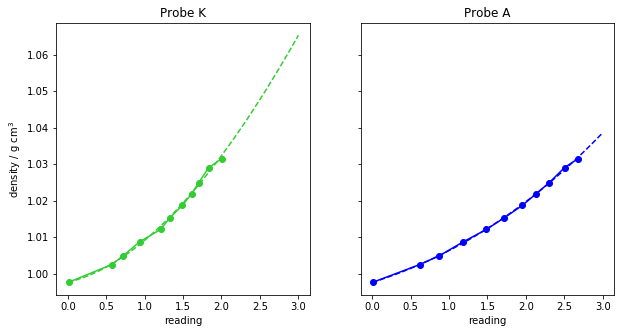

In [21]:
coefK, statsK = P.polyfit(mean_read_ch2,df.density,3,full=True)
coefA, statsA = P.polyfit(mean_read_ch4,df.density,3,full=True)

read_dummy = np.linspace(0,3,30)
fitK = coefK[0]+(coefK[1]*read_dummy)+(coefK[2]*read_dummy**2) + (coefK[3]*read_dummy**3)
fitA = coefA[0]+(coefA[1]*read_dummy)+(coefA[2]*read_dummy**2) + (coefA[3]*read_dummy**3)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax0.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='limegreen')
ax0.plot(read_dummy, fitK, '--',color='limegreen')

ax1.errorbar(mean_read_ch4,df.density, xerr=std_read_ch4, marker='o', color='blue')
ax1.plot(read_dummy, fitA,'--', color='blue')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax0.set_title('Probe K')
ax1.set_title('Probe A')

print('Probe K')
print('rho_K = %f+%fr+%fr^2+%fr^3 \n' %(coefK[0], coefK[1], coefK[2], coefK[3]))

print('Probe A')
print('rho_A = %f+%fr+%fr^2+%fr^3' %(coefA[0], coefA[1], coefA[2], coefA[3]))

To get density from the conduino probes:

Probe K 

$\rho_K = 0.997645+0.004937r+0.006870r^2+-0.000332r^3$

Probe A 

$\rho_A = 0.997590+0.006686r+0.001903r^2+0.000142r^3$

Where r is the reading from the probe.

